Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Collection & Processing

In [3]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/calories.csv')

In [4]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exercise_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/exercise.csv')

In [6]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Checking if the User_ID column has any repeating values

In [7]:
exercise_data.User_ID.unique().shape

(15000,)

Combining the two Dataframes

In [8]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [9]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [11]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [12]:
# checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [13]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [14]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


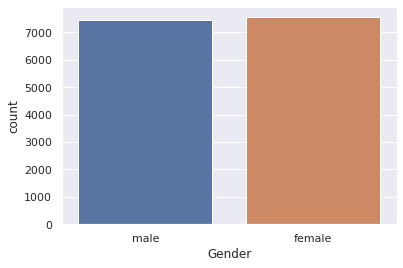

In [15]:
# plotting the gender column in count plot
sns.countplot(calories_data['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


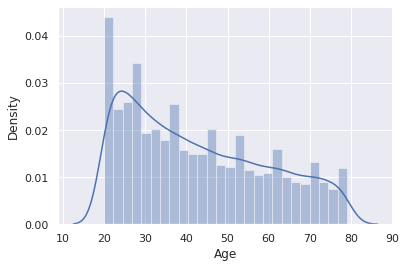

In [16]:
# finding the distribution of "Age" column
sns.distplot(calories_data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


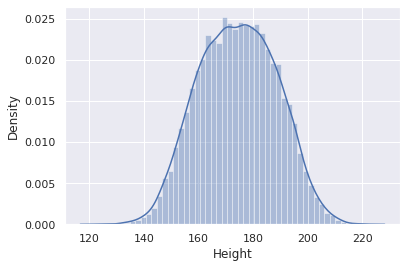

In [17]:
# finding the distribution of "Height" column
sns.distplot(calories_data['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


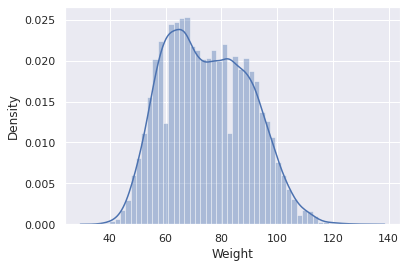

In [18]:
# finding the distribution of "Weight" column
sns.distplot(calories_data['Weight'])

Finding the Correlation in the dataset

1. Positive Correlation
2. Negative Correlation

In [19]:
correlation = calories_data.corr()

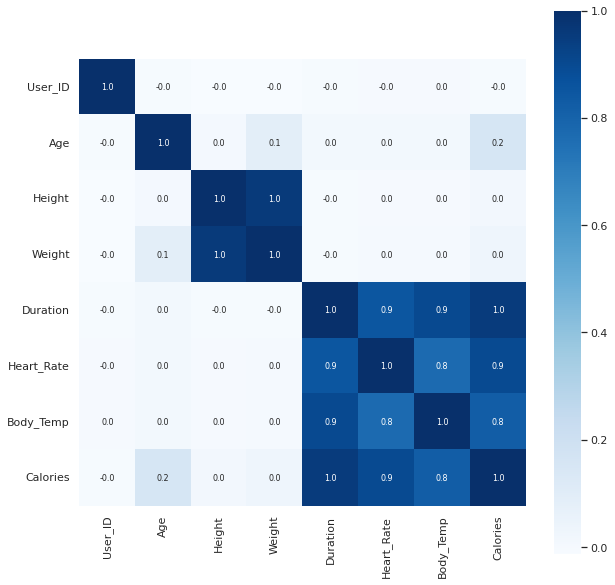

In [20]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


Converting the text data to numerical values

In [21]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [22]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating features and Target

In [23]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [24]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [28]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into training data and Test data

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape,Y_test.shape)

(15000, 7) (12000, 7) (3000, 7) (3000,)


Model Training

Loading & Training the Models

In [29]:
# loading Linear Regressor Model
linear_model = LinearRegression()
# training the model with X_train
linear_model.fit(X_train, Y_train)

LinearRegression()

In [30]:
# loading Decision Tree Regressor Model
dtr_model = DecisionTreeRegressor()
# training the model with X_train
dtr_model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [31]:
# loading Random Forest Regressor Model
rf_model = RandomForestRegressor()
# training the model with X_train
rf_model.fit(X_train,Y_train)

RandomForestRegressor()

In [32]:
# loading XGB Regressor Model
xgb_model = XGBRegressor()
# training the model with X_train
xgb_model.fit(X_train,Y_train)

[12:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [33]:
# loading SVM Model
svr_model=SVR()
# training the model with X_train
svr_model.fit(X_train,Y_train)

SVR()

In [34]:
svr_model.score(X_test,Y_test)

0.9380560925377789

Evaluation

Prediction on Test Data using all the models

In [35]:
y_pred1 = linear_model.predict(X_test)
y_pred2 = dtr_model.predict(X_test)
y_pred3 = rf_model.predict(X_test)
y_pred4 = xgb_model.predict(X_test)
y_pred5 = svr_model.predict(X_test)

Plotting Test vs Predicted data

Linear Regressor


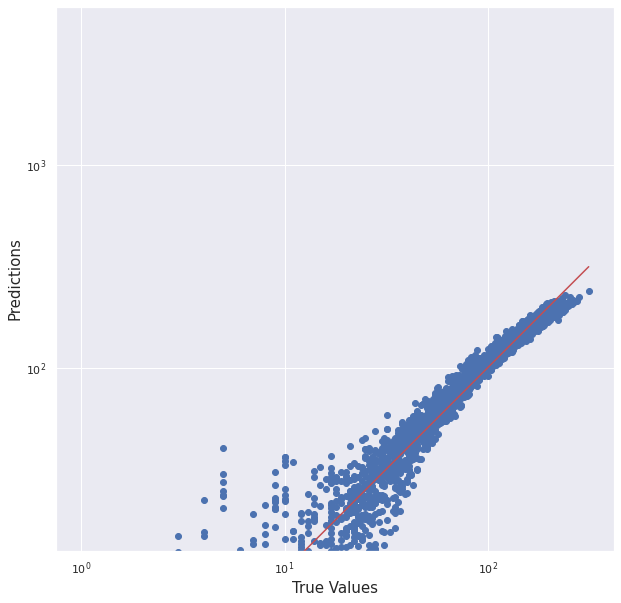

Decision Tree Regressor


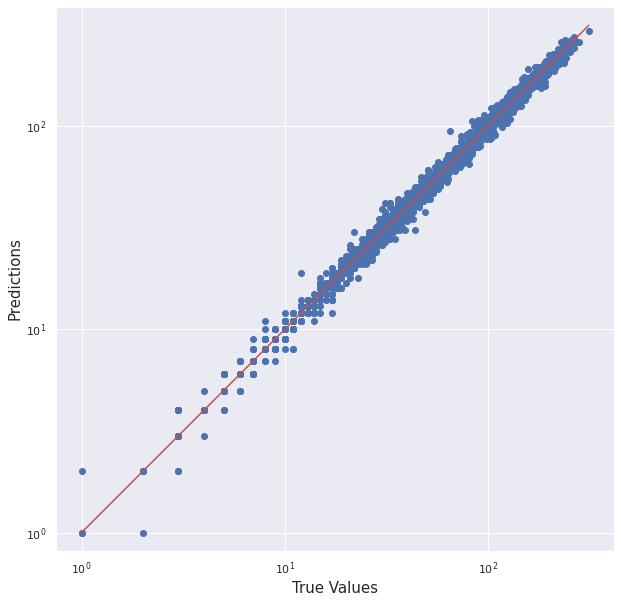

Random Forest Regressor


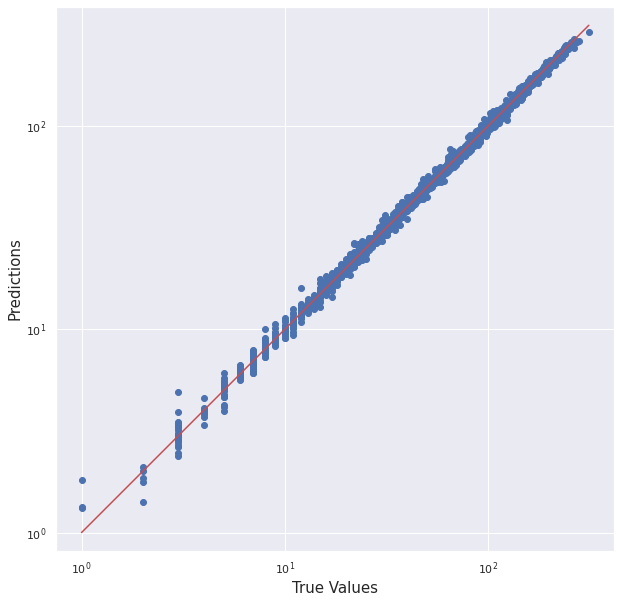

XGB Regressor


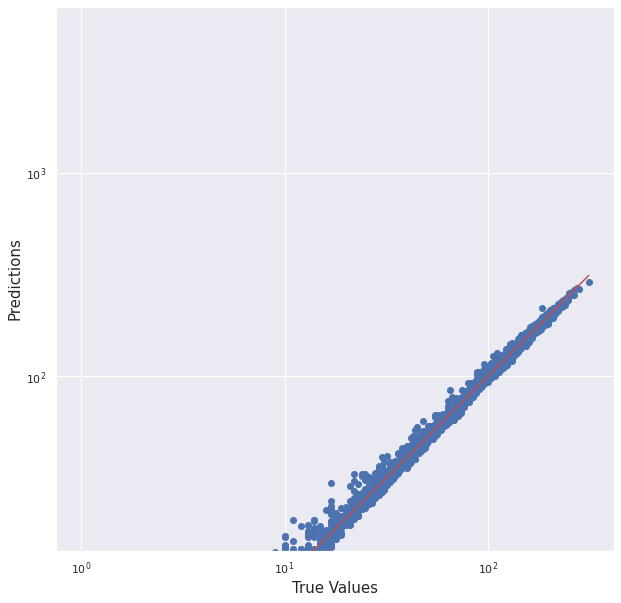

SVM Regressor


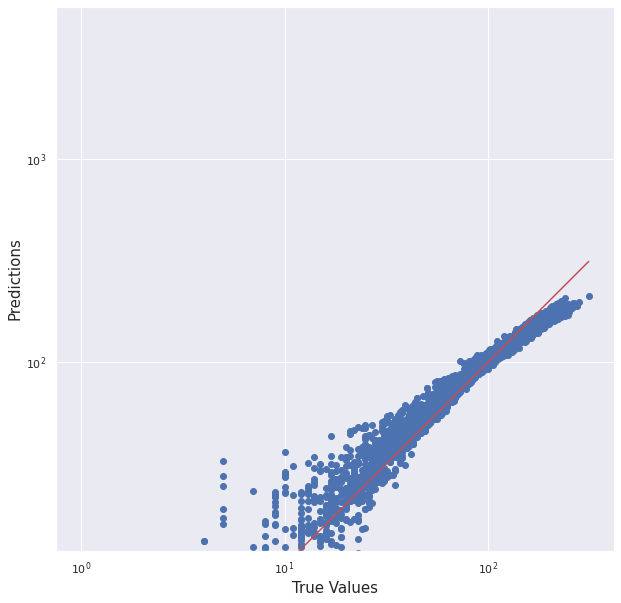

In [36]:
a=[y_pred1,y_pred2,y_pred3,y_pred4,y_pred5]
b=["Linear Regressor","Decision Tree Regressor","Random Forest Regressor","XGB Regressor","SVM Regressor"]
for i in range(0,5):
    print(b[i])
    plt.figure(figsize=(10,10))
    plt.scatter(Y_test,a[i])
    plt.yscale('log')
    plt.xscale('log')
    
    p1=max(max(Y_test),max(a[i]))
    p2=min(min(Y_test),min(a[i]))
    plt.plot([p1,p2],[p1,p2],'r-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    #plt.axis('square')
    plt.show()

Mean Absolute Error

In [37]:
mae1 = metrics.mean_absolute_error(Y_test, y_pred1)
mae2 = metrics.mean_absolute_error(Y_test, y_pred2)
mae3 = metrics.mean_absolute_error(Y_test, y_pred3)
mae4 = metrics.mean_absolute_error(Y_test, y_pred4)
mae5 = metrics.mean_absolute_error(Y_test, y_pred5)

In [38]:
list1 = [mae1,mae2,mae3,mae4,mae5]
mae = np.array(list1)
print("Mean Absolute Errors = ", mae)

Mean Absolute Errors =  [ 8.38518805  3.40766667  1.72316667  2.71590125 10.62061436]


Root Mean Squared Error (RMSE)

In [39]:
rmse1 = np.sqrt(metrics.mean_squared_error(Y_test, y_pred1))
rmse2 = np.sqrt(metrics.mean_squared_error(Y_test, y_pred2))
rmse3 = np.sqrt(metrics.mean_squared_error(Y_test, y_pred3))
rmse4 = np.sqrt(metrics.mean_squared_error(Y_test, y_pred4))
rmse5 = np.sqrt(metrics.mean_squared_error(Y_test, y_pred5))

In [40]:
list2 = [rmse1,rmse2,rmse3,rmse4,rmse5]
rmse = np.array(list2)
print("RMSE = ", rmse)

RMSE =  [11.40557205  5.29336062  2.71944069  3.80873535 15.5978557 ]


R Squared (R2)

In [41]:
r2_1 = metrics.r2_score(Y_test, y_pred1)
r2_2 = metrics.r2_score(Y_test, y_pred2)
r2_3 = metrics.r2_score(Y_test, y_pred3)
r2_4 = metrics.r2_score(Y_test, y_pred4)
r2_5 = metrics.r2_score(Y_test, y_pred5)

In [42]:
list3 = [r2_1,r2_2,r2_3,r2_4,r2_5]
r2 = np.array(list3)
print("R2 = ", r2)

R2 =  [0.96687904 0.99286602 0.9981171  0.99630657 0.93805609]


Adjusted R Squared

In [43]:
n=15000 #number of observations
k=7 #number of independent variables
list4=[]
for i in r2:
    t = 1-((1-i)*(n-1)/(n-k-1))
    list4.append(t)
adj_r2=np.array(list4)
print("Adjusted r2 = ",adj_r2)

Adjusted r2 =  [0.96686357 0.99286269 0.99811622 0.99630484 0.93802717]


Creating a Data Frame to store the evaluation results

In [44]:
#data=np.array([mae,rmse,r2,adj_r2])
data=np.array([list1,list2,list3,list4])
index_val=["MAE","RMSE","R2","Adj R2"]
col_val=["Linear Reg","Decision Tree","Random Forest","XGB Reg","SVM"]
df = pd.DataFrame(data,index=index_val,columns=col_val)
print(df)

        Linear Reg  Decision Tree  Random Forest   XGB Reg        SVM
MAE       8.385188       3.407667       1.723167  2.715901  10.620614
RMSE     11.405572       5.293361       2.719441  3.808735  15.597856
R2        0.966879       0.992866       0.998117  0.996307   0.938056
Adj R2    0.966864       0.992863       0.998116  0.996305   0.938027
